# Ejercicio del archivo fve32.mat

1. Muestra el heatmap de la matriz de activación
2. Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)
3. Determina el nodo con mayores conexiones
4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

In [9]:
import networkx as nx
import scipy.io # paquete enfocado a funciones estadísticas.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Quinto semestre 1\Modelos\Git\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"

In [2]:
fve_json = scipy.io.loadmat(path)
fve_json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 16:26:48 2007',
 '__version__': '1.0',
 '__globals__': [],
 'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

In [3]:
fve_json.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

In [4]:
Names = fve_json['Names']
CIJ = fve_json['CIJ']

In [11]:
df = pd.DataFrame(CIJ, columns=Names, index=Names)
df

,V1,V2,V3,VP,V3a,V4,VOT,V4t,MT,FST,...,PO,PIP,LIP,VIP,MIP,MDP,DP,7a,FEF,46
V1,0,1,1,0,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
V2,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,0,0,1,0
V3,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,0,0,0,1,0
VP,0,1,1,0,1,1,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
V3a,1,1,1,1,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,1,0
V4,1,1,1,1,1,0,0,1,1,1,...,0,1,1,0,0,0,1,0,1,1
VOT,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V4t,1,0,1,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
MT,1,1,1,1,1,1,0,1,0,1,...,1,1,1,1,0,0,0,0,1,1
FST,0,0,1,0,1,1,0,1,1,0,...,0,0,1,1,0,0,0,1,1,0


Text(0.5, 1.0, 'Mapa de calor de matriz de activación')

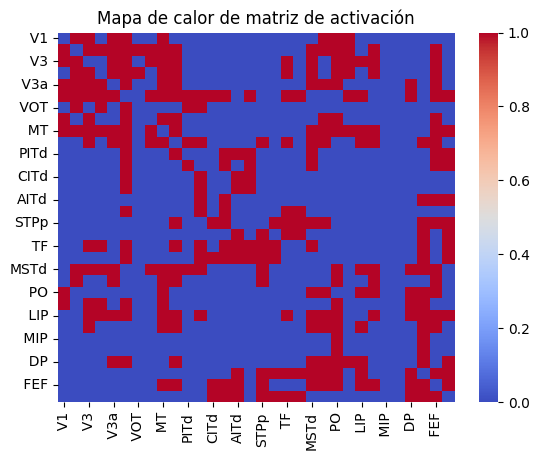

In [13]:
sns.heatmap(df, cmap='coolwarm')
plt.title("Mapa de calor de matriz de activación")

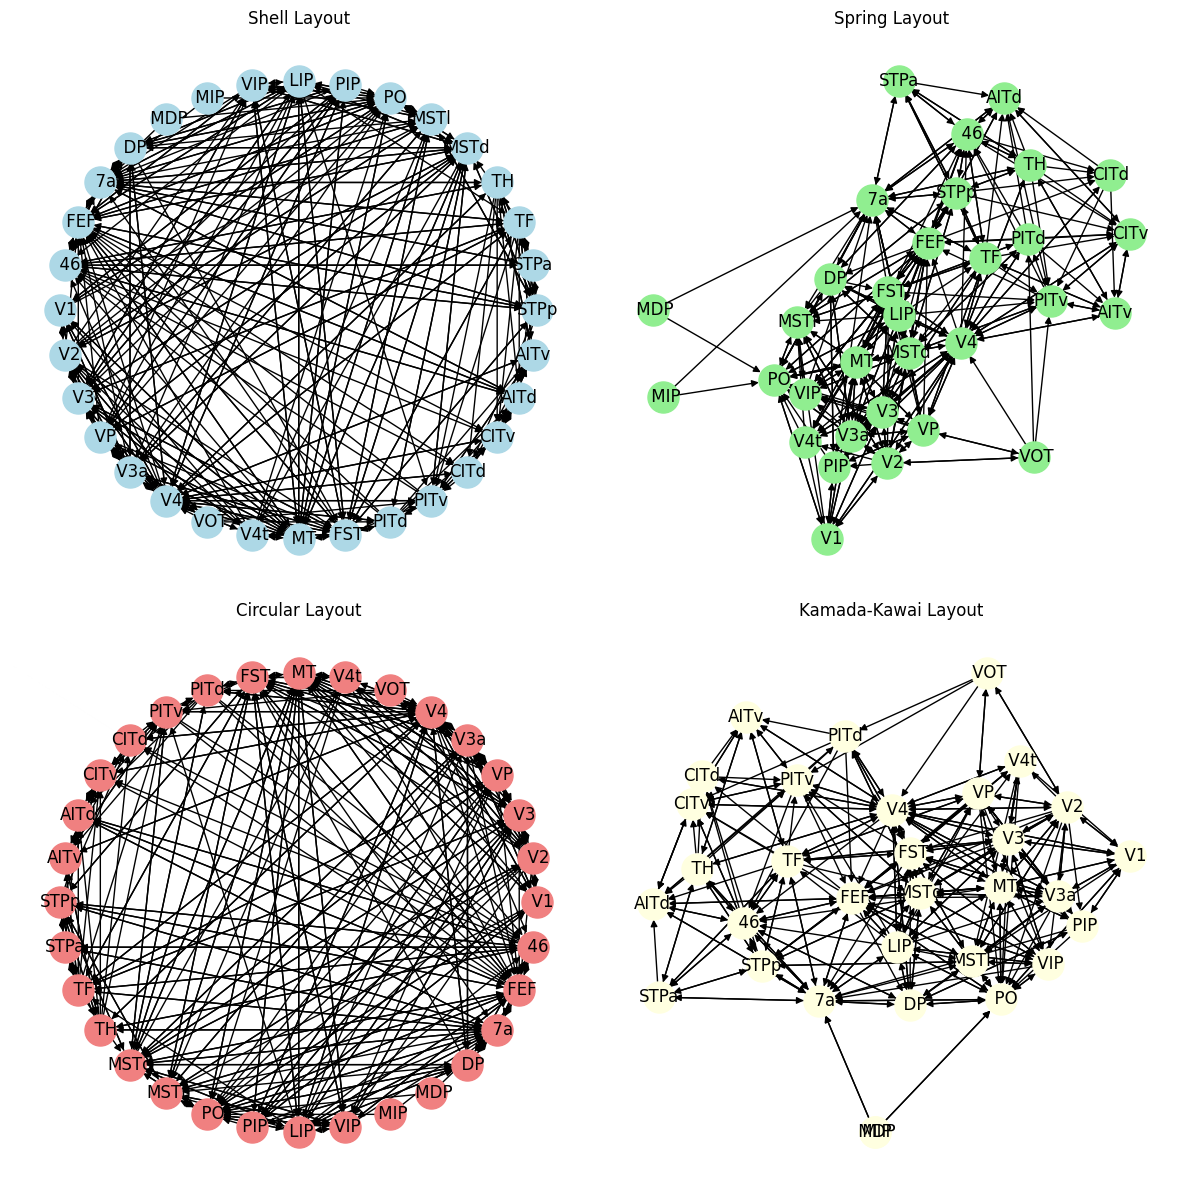

In [18]:
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

# Grafo de 4 formas distintas
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Shell Layout
axs[0, 0].set_title("Shell Layout")
shell_pos = nx.shell_layout(G)
nx.draw(G, pos=shell_pos, with_labels=True, ax=axs[0, 0], node_color='lightblue', node_size=500, font_size=12)

# Spring Layout
axs[0, 1].set_title("Spring Layout")
spring_pos = nx.spring_layout(G)
nx.draw(G, pos=spring_pos, with_labels=True, ax=axs[0, 1], node_color='lightgreen', node_size=500, font_size=12)

# Circular Layout
axs[1, 0].set_title("Circular Layout")
circular_pos = nx.circular_layout(G)
nx.draw(G, pos=circular_pos, with_labels=True, ax=axs[1, 0], node_color='lightcoral', node_size=500, font_size=12)

# Kamada-Kawai Layout
axs[1, 1].set_title("Kamada-Kawai Layout")
kk_pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=kk_pos, with_labels=True, ax=axs[1, 1], node_color='lightyellow', node_size=500, font_size=12)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()

In [19]:
# Calcular el in-degree (conexiones entrantes)
in_degrees = df.sum(axis=0)  # Suma por columnas para obtener el in-degree

# Calcular el out-degree (conexiones salientes)
out_degrees = df.sum(axis=1)  # Suma por filas para obtener el out-degree

# Determinar el nodo con el mayor in-degree (entradas)
max_in_degree_node = in_degrees.idxmax()  # Nodo con el mayor in-degree
max_in_degree_value = in_degrees.max()   # Valor del máximo in-degree

# Determinar el nodo con el mayor out-degree (salidas)
max_out_degree_node = out_degrees.idxmax()  # Nodo con el mayor out-degree
max_out_degree_value = out_degrees.max()   # Valor del máximo out-degree

In [20]:
max_out_degree_node

'  V4'

In [21]:
max_out_degree_value

np.uint64(20)